In [9]:
#importing packages for this project

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re, string, unicodedata
from bs4 import BeautifulSoup

!pip install contractions
import nltk
import contractions

nltk.download('wordnet')
nltk.download('punkt')

from nltk.tokenize import word_tokenize 
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
!pip install mlxtend
from mlxtend.plotting import plot_confusion_matrix
!pip install imblearn
from imblearn.over_sampling import SMOTE

[nltk_data] Downloading package wordnet to C:\Users\Eak.DESKTOP-
[nltk_data]     EK9UGBG\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Eak.DESKTOP-
[nltk_data]     EK9UGBG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
#Loading Tweets.csv dataset
tweets_data = pd.read_csv('Tweets.csv')

In [11]:
tweets_data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [12]:
tweets_data.shape

(14640, 15)

In [13]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [14]:
tweets_data.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [15]:
# Check for duplicate rows
duplicateRowsDF = tweets_data[tweets_data.duplicated()]
print(duplicateRowsDF.head())
print(duplicateRowsDF.shape)  
# There are 36 duplicate rows

                 tweet_id airline_sentiment  airline_sentiment_confidence  \
12040  570308309682675712          negative                           1.0   
12059  570305051819941889           neutral                           1.0   
12063  570303383782989824           neutral                           1.0   
12066  570301929580048385           neutral                           1.0   
12068  570301395141836801          negative                           1.0   

               negativereason  negativereason_confidence   airline  \
12040  Customer Service Issue                        1.0  American   
12059                     NaN                        NaN  American   
12063                     NaN                        NaN  American   
12066                     NaN                        NaN  American   
12068             Late Flight                        1.0  American   

      airline_sentiment_gold            name negativereason_gold  \
12040                    NaN      SweeLoTmac    

In [16]:
# Drop the duplicate rows
tweets_data.drop_duplicates(keep=False,inplace=True) 

In [17]:
tweets_data.shape

(14568, 15)

In [18]:
tweets_data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.456800e+04,14568.000000,10484.000000,14568.000000
mean,5.692131e+17,0.899675,0.636987,0.082921
std,7.773880e+14,0.163080,0.330318,0.747520
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685551e+17,0.691975,0.360300,0.000000
50%,5.694655e+17,1.000000,0.670400,0.000000
75%,5.698859e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


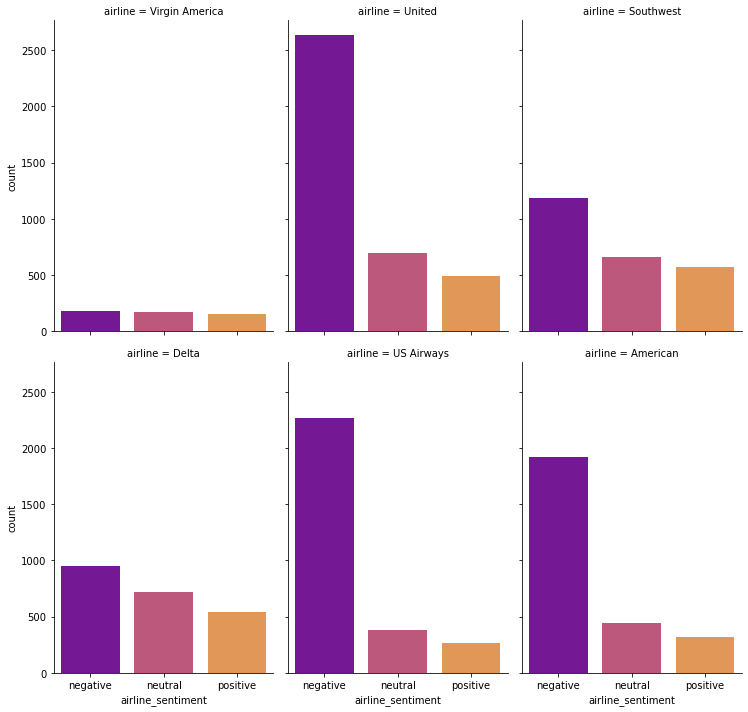

In [19]:
#EDA on airline feedback

s = sns.FacetGrid(tweets_data, col="airline", col_wrap=3, height=5, aspect =0.7)
s = s.map(sns.countplot, "airline_sentiment",order =tweets_data.airline_sentiment.value_counts().index, palette='plasma')
plt.show()
# Here we can see that United Airlines, US Airways, American Airlines has the most number of negative review
# Virgin America has the least number of negative reviews

Customer Service Issue         2898
Late Flight                    1655
Can't Tell                     1190
Cancelled Flight                839
Lost Luggage                    718
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     479
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


C:\Users\Eak.DESKTOP-EK9UGBG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


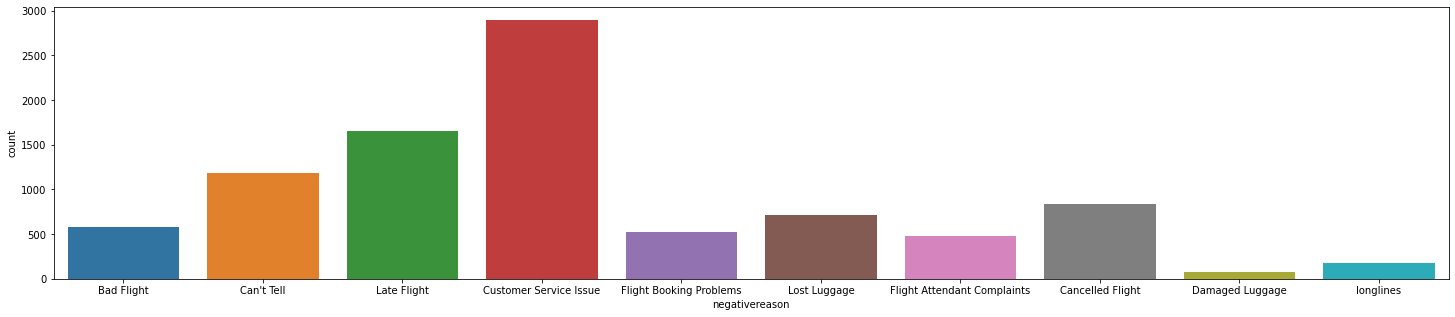

In [20]:
# Checking the most common negative reason 
y = tweets_data['negativereason']
print(y.value_counts())
plt.figure(figsize=(25,5)) 
s = sns.countplot(y)


In [ ]:
# Customer service and Late flight seems to be the main reason why customers are giving bad feedback

In [ ]:
#First step to drop unwanted columns, will retain airline_sentiment and text column.

In [21]:
tweets_data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [22]:
# Now remove irrelevant columns
tweets_data_relevant = tweets_data.drop(['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count','tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'], axis =1)

In [23]:
tweets_data.shape

(14568, 15)

In [24]:
tweets_data_relevant.shape

(14568, 2)

In [25]:
tweets_data_relevant.head(5)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [26]:
tweets_data_relevant.airline_sentiment.value_counts()

negative    9140
neutral     3083
positive    2345
Name: airline_sentiment, dtype: int64

negative    9140
neutral     3083
positive    2345
Name: airline_sentiment, dtype: int64


C:\Users\Eak.DESKTOP-EK9UGBG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


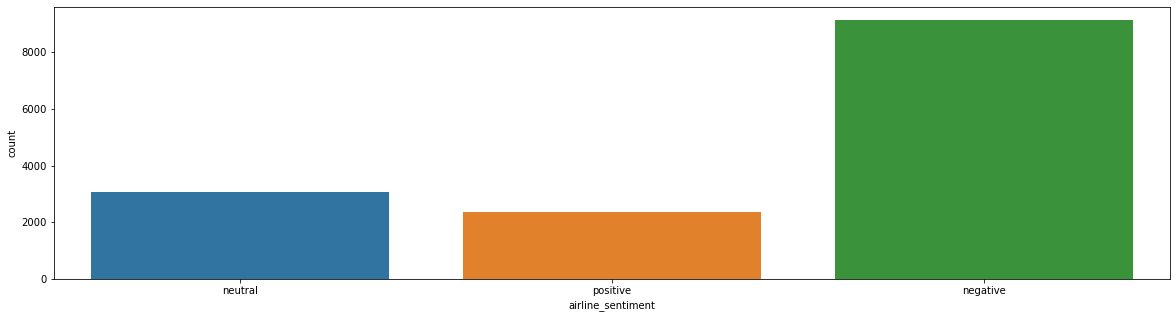

In [27]:
y = tweets_data_relevant['airline_sentiment']
print(y.value_counts())
plt.figure(figsize=(20,5)) 
s = sns.countplot(y)
# No, Here we can see that the data is not balanced, There are lot of negative sentiments

In [28]:
def perform_html_cleanup( raw_review ):
  # 1. Remove HTML
  review_text = BeautifulSoup(raw_review).get_text()
  return review_text

In [29]:
def replace_contractions(raw_review):
    #Replace contractions in raw_review
    return contractions.fix(raw_review)

In [30]:
def perform_tokenization( raw_review ):
  # 2. Perform Tokenization
  word_tokens = word_tokenize(raw_review)  # Tokenization
  return word_tokens

In [31]:
def remove_numbers(list_of_words): 
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list_of_words] 
    return list

In [32]:
def remove_special_character_punctuation(list_of_words): 
    pattern = '[^A-Za-z0-9]+'
    list = [re.sub(pattern, '', i) for i in list_of_words] 
    return list

In [33]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words

In [34]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [35]:
def remove_empty_string(words):
  return list(filter(None, words))

In [36]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []                            # Create empty list to store pre-processed words.
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)                # Append processed words to new list.
    return stems

In [37]:
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []                           # Create empty list to store pre-processed words.
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)              # Append processed words to new list.
    return lemmas

In [38]:
def perform_cleanup(raw_review):
    clean_review = perform_html_cleanup(raw_review)
    clean_review = replace_contractions(clean_review)
    clean_review = perform_tokenization(clean_review)
    clean_review = remove_numbers(clean_review)
    clean_review = remove_special_character_punctuation(clean_review)
    clean_review = remove_punctuation(clean_review)
    clean_review  = to_lowercase(clean_review)
    clean_review = remove_empty_string(clean_review)
    #clean_review = stem_words(clean_review)
    clean_review = lemmatize_verbs(clean_review)
    return clean_review

In [39]:
tweets_data_relevant.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [40]:
clean_reviews = []

for i, row in tweets_data_relevant.iterrows():
    words = tweets_data_relevant.at[i, 'text']
    words = perform_cleanup(words)
    tweets_data_relevant.at[i,'text'] = " ".join( words )
    clean_reviews.append( tweets_data_relevant.at[i, 'text'] )
tweets_data_relevant.head()

,airline_sentiment,text
0,neutral,virginamerica what dhepburn say
1,positive,virginamerica plus you have add commercials to...
2,neutral,virginamerica i do not today must mean i need ...
3,negative,virginamerica it be really aggressive to blast...
4,negative,virginamerica and it be a really big bad thing...


In [41]:
tweets_data_relevant.head()

,airline_sentiment,text
0,neutral,virginamerica what dhepburn say
1,positive,virginamerica plus you have add commercials to...
2,neutral,virginamerica i do not today must mean i need ...
3,negative,virginamerica it be really aggressive to blast...
4,negative,virginamerica and it be a really big bad thing...


In [42]:
print ("Creating the bag of words...\n")
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
count_vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
count_vectorizer_data_features = count_vectorizer.fit_transform(clean_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
count_vectorizer_data_features = count_vectorizer_data_features.toarray()

Creating the bag of words...



In [43]:
count_vectorizer_data_features.shape
count_vectorizer_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [44]:
print(count_vectorizer_data_features.shape)
print(count_vectorizer_data_features)

(14568, 5000)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [46]:
# Take a look at the words in the vocabulary
count_vectorizer_vocab = count_vectorizer.get_feature_names_out()
print (count_vectorizer_vocab)

['aa' 'aacom' 'aadv' ... 'zone' 'zoom' 'zurich']


In [47]:
count_vectorizer_stop_words = count_vectorizer.get_stop_words()
print (count_vectorizer_stop_words)
# There are no stop words since we are doing sentiment analysis

None


In [48]:
# Sum up the counts of each vocabulary word
dist = np.sum(count_vectorizer_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(count_vectorizer_vocab, dist):
    print (count, tag)

274 aa
3 aacom
2 aadv
10 aadvantage
2 aafail
2 aal
2 aano
3 aarp
3 abandon
8 abc
3 abcnetwork
2 abilities
5 ability
119 able
4 aboard
516 about
18 above
9 abq
2 abroad
22 absolute
30 absolutely
13 absurd
3 abuse
6 abysmal
9 ac
32 accept
23 acceptable
39 access
5 accident
4 accidentally
26 accommodate
8 accommodations
4 accomplish
11 accord
4 accordingly
91 account
6 accountability
2 accrue
2 accts
10 accurate
2 accuse
3 achieve
4 acknowledge
2 acknowledgement
2 acknowledgment
2 acquire
2 acquisition
16 across
18 act
13 action
2 activate
4 active
1 activities
2 activitiesprevention
1 activity
21 actual
86 actually
1 actualy
1 acu
4 ad
2 adam
126 add
4 addition
17 additional
52 address
3 addtl
2 adjacent
5 admiral
12 admirals
6 admit
6 adopt
2 adore
5 ads
2 adult
14 advance
15 advantage
11 advertise
9 advice
20 advise
2 advisories
24 advisory
2 aerojobmarket
15 affect
3 affiliate
13 afford
3 affordable
2 afraid
467 after
2 afterall
30 afternoon
391 again
6 against
15 age
6 agency
258 age

4 duh
12 dull
4 dullesairport
2 dultch
8 dumb
5 dump
2 dupe
3 durango
59 during
4 duty
50 each
2 eagle
2 ear
93 earlier
2 earliest
97 early
3 earlybird
26 earn
6 earth
2 earthquake
12 easier
4 easiest
13 easily
13 east
8 eastern
36 easy
18 eat
2 eb
3 eco
3 econ
15 economy
2 ed
2 edinburgh
2 edit
3 educate
2 education
2 educational
5 efficiency
4 efficient
12 effort
6 efforts
2 eh
2 eight
42 either
3 el
2 elaborate
4 elderly
10 elevate
2 eligible
14 elite
2 eliz
5 ella
3 ellahenderson
2 elm
60 else
9 elsewhere
285 email
16 embarrass
2 embarrassment
2 embassy
4 emboss
2 embraersa
2 emerald
18 emergency
2 emp
2 empathize
3 empathy
2 employ
36 employee
85 employees
2 employer
46 empty
2 ems
2 emv
6 en
5 encounter
2 encourage
72 end
3 endless
2 endlessly
2 energy
3 enforce
2 engage
18 engine
9 english
33 enjoy
3 enjoyable
72 enough
4 enquire
2 enroll
6 enroute
8 ensure
25 enter
2 enterprise
7 entertain
25 entertainment
45 entire
4 entirely
3 entitle
2 entrance
3 entry
2 enuf
2 environment
3

4 kylejudah
44 la
2 labor
61 lack
5 ladies
25 lady
12 ladygaga
3 lag
10 laguardia
2 laguardiaair
5 lake
12 lame
2 lan
179 land
10 lap
9 laptop
11 large
3 larger
2 largest
2 larry
46 las
3 lasairport
305 last
424 late
3 latimes
12 lauderdale
7 laugh
2 laurasbrown
8 lauren
5 lavatory
4 law
3 laws
2 lawsuit
122 lax
2 laxiad
2 laxnyc
2 lay
32 layover
5 layovers
6 lazy
3 lb
8 lbs
17 lead
2 leadership
2 league
2 leak
41 learn
87 least
380 leave
43 leg
2 legacy
5 legal
2 legally
3 legit
3 legitimate
14 legroom
10 legs
2 leinenkugels
2 length
66 less
11 lesson
275 let
2 letdown
4 letsgo
33 letter
18 level
2 lexington
52 lga
2 lgb
4 lh
10 lhr
2 liable
2 liars
6 license
53 lie
3 lieflat
54 life
7 lifetime
2 lift
23 light
432 like
3 likelihood
19 likely
2 lil
2 lima
18 limit
3 lindsey
208 line
73 link
3 lisa
46 list
32 listen
29 literally
66 little
2 littlebirds
57 live
8 livery
3 livid
7 ll
6 lmao
4 lmfao
2 lo
55 load
2 loan
2 loaner
4 loc
9 local
3 locals
23 locate
7 location
6 locations
13 loc

30 round
11 roundtrip
28 rout
29 route
68 row
3 roxydigital
2 royally
15 rr
14 rsw
94 rt
2 rtb
2 ru
2 rub
2 rubber
2 rubbish
133 rude
2 rudely
4 rudeness
4 rudest
45 ruin
21 rule
2 rum
3 rumor
92 run
3 runaround
62 runway
3 runways
5 rush
2 russia
2 ruth
2 rwrd
4 sabre
2 sacraig
4 sacramento
38 sad
3 sadden
10 sadly
4 safari
24 safe
16 safely
39 safety
3 safetyfirst
3 saga
11 sale
5 sales
2 sally
9 salt
2 samartzis
159 same
2 sammijons
2 sample
77 san
2 sand
2 sandiego
4 sandwich
3 sanfrancisco
2 sanitize
2 sanitizer
2 sanity
2 sanm
4 santa
7 sarcasm
2 sass
2 satisfaction
2 satisfactory
3 satisfy
26 saturday
3 sauce
2 sav
6 savannah
37 save
4 saver
2 savethediagonals
28 saw
508 say
4 sayin
3 sb
4 sc
6 scale
6 scam
8 scan
5 scar
2 scatter
8 scavenger
2 scenario
3 scene
2 sch
4 sched
98 schedule
3 scheme
15 school
2 science
2 sciencebehindtheexperience
2 scotch
4 scott
2 scratch
4 scream
20 screen
2 screenshot
48 screw
4 sdf
15 sea
2 seam
3 sean
12 search
2 season
515 seat
3 seatac
2 sea

3 witness
2 wk
4 wknd
2 wkrb
5 wks
3 wld
3 wmcactionnews
3 wmy
2 wn
4 wno
27 wo
3 woaw
15 woman
7 women
40 wonder
29 wonderful
3 woo
3 woof
4 woohoo
44 word
407 work
2 workaround
4 worker
11 workers
49 world
1 worm
1 worrisome
54 worry
62 worse
240 worst
5 worstairline
8 worstairlineever
7 worstcustomerservice
3 worstcustomerserviceever
1 worstcustservice
1 worstever
2 worstflight
3 worstflightever
1 worstflightexperienceever
1 worstservice
1 worstthingever
1 worsttraveldayever
1 worsttripofmylife
3 worstunitedflightsever
29 worth
6 worthless
737 would
2 wouldbe
2 wound
3 wour
10 wout
46 wow
3 wrap
5 wreck
33 write
76 wrong
2 wrongfully
15 wsj
41 wtf
8 wth
2 wudda
2 wut
2 wx
10 wyou
3 xdaily
3 xday
3 xna
2 xoxo
2 xt
3 xweekly
7 xx
13 ya
2 yards
11 yay
12 yea
43 yeah
97 year
2 yearly
47 years
15 yell
17 yep
240 yes
4 yest
107 yesterday
154 yet
2 yikes
19 yo
11 york
4875 you
2 youareonyourown
3 youk
9 young
2 younger
1735 your
7 yours
5 yourself
5 yourselves
8 yous
4 yousuck
3 youth
2 yo

In [49]:
# Initialize the "TfidfVectorizer" object
# Convert a collection of raw documents to a matrix of TF-IDF features.
tfidf_vectorizer = TfidfVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000,
                             min_df=5, 
                             max_df=0.7,
                             ngram_range=(1,2)) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
tfidf_vectorizer_data_features = tfidf_vectorizer.fit_transform(clean_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
tfidf_vectorizer_data_features = tfidf_vectorizer_data_features.toarray()

In [50]:
print (tfidf_vectorizer_data_features.shape)
print(tfidf_vectorizer_data_features)

(14568, 5000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [52]:
# Take a look at the words in the vocabulary
tfidf_vectorizer_vocab = tfidf_vectorizer.get_feature_names_out()
print (tfidf_vectorizer_vocab)

['aa' 'aa be' 'aadvantage' ... 'yyz' 'zero' 'zone']


In [53]:
tfidf_vectorizer_stop_words = tfidf_vectorizer.get_stop_words()
print (tfidf_vectorizer_stop_words)

None


In [54]:
# Sum up the counts of each vocabulary word
tf_df_dist = np.sum(tfidf_vectorizer_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(tfidf_vectorizer_vocab, tf_df_dist):
    print (count, tag)

52.724441321484505 aa
3.446130661198859 aa be
2.8916383358537825 aadvantage
24.030209350516788 able
22.30831568247479 able to
86.91646159407996 about
3.4288613654905347 about an
7.371792721538559 about it
10.9319098769699 about my
3.0774386090414834 about our
14.819627058389196 about the
4.434602336262759 about this
6.197864809713441 about to
4.347572796818376 about you
5.753403920688679 about your
5.296781844539412 above
6.833150030347803 absolute
9.944184187994313 absolutely
3.7628171755097997 absurd
2.5825421372281996 ac
9.424758829819098 accept
6.317689837724596 acceptable
10.669049874502814 access
5.663949020633231 access to
7.196811310948114 accommodate
3.2455787191965264 accord
3.2455787191965264 accord to
20.746389662366074 account
2.984627288531152 accurate
4.734170664733707 across
5.420868409305928 act
4.123767242276361 action
5.7009588486251035 actual
20.378019704009066 actually
29.32536894753799 add
4.653959711623271 add my
3.9446696950250986 add to
4.735887745630221 additi

2.4992598570256095 by unite
5.098309647048401 by your
3.942416750005613 cab
10.796161232445542 cabin
4.016258141199023 california
112.11044028179242 call
7.895917732859909 call and
19.28679003222445 call back
4.547614462044842 call be
5.595484267777771 call center
4.4112656242955035 call customer
5.267709987664143 call for
3.0621788485997166 call from
2.84848506506915 call in
3.4598030312207886 call it
13.05693141307368 call me
5.922949169787233 call the
2.662959741222059 call them
8.569753639302837 call to
4.324836601815559 call volume
4.592712827338521 call you
3.6120302797862944 call your
5.52029577778596 callback
211.04659787346577 can
5.9908556381102525 can be
3.965586820016392 can book
3.1046186253926003 can bring
4.180556644007413 can call
2.759210768282044 can change
8.086535272899233 can dm
13.166999302973885 can do
3.384943386376482 can fly
21.495650939452716 can get
3.012712305919165 can have
7.898969460609924 can help
5.073191191055756 can make
95.7439678635025 can not
3.41

3.6497124122402287 few weeks
3.279181609922952 field
4.926392593152335 fight
13.113641875685847 figure
3.5444187618505856 figure it
7.044078677866015 figure out
12.518860964872085 file
2.9348122617389545 file claim
9.369013946548051 fill
5.076074021263173 fill out
5.2449795824373275 final
2.8290472007971754 final destination
31.530865813314758 finally
7.899854910639719 finally get
46.491808251473124 find
4.688912473437682 find it
7.18086772004274 find my
8.18328130550503 find out
3.3402864385495823 find the
10.150822332608682 fine
6.940075527502053 finger
5.028189921286203 finger cross
3.384320221669887 finish
4.115368484799032 fire
50.46630040824407 first
14.99685000460274 first class
6.010887320032331 first flight
10.061851449375846 first time
5.6899552305031325 fit
4.5683720422897895 five
27.644157299369304 fix
4.837262218915623 fix it
4.742364378912138 fix the
4.910202581368557 fix this
3.241360927432333 fix your
7.664851791519346 fl
45.11670560254544 fleek
42.58430968639612 fleek 

19.704938519533883 his
3.075831152041538 history
6.6821819190238765 hit
108.40054421378203 hold
4.2166873613794245 hold and
47.79664728575625 hold for
3.203213505179091 hold hours
2.7676968893617 hold min
3.391994235415315 hold now
3.232802439623927 hold on
2.9405877604382873 hold over
6.184341193535185 hold time
6.282923696400883 hold to
3.0744794361805616 hold up
6.445100021958777 hold with
54.22543947496289 home
3.204884288542356 home and
6.7886829733851215 home to
2.7726135093613924 home today
2.64181378859987 home tonight
4.11022175597073 honest
3.0667028623902794 honestly
3.374780862508433 honeymoon
6.239271258671586 honor
5.212011489684021 hook
15.861305096589083 hop
4.483072552700392 hop for
2.605423680909906 hop to
31.617551571117904 hope
3.130012298260543 hope it
4.8728459034606395 hope so
3.029202480358579 hope to
9.409909172540205 hope you
11.793492666418414 hopefully
20.0938982300144 horrible
3.0595812879405067 horrible experience
2.4968673816529727 horrible service
3.1642

3.3549699966797455 minor
30.854229408406376 mins
3.1314780597494734 mins and
3.2347373345635733 mins to
5.444656530562754 mint
14.015826252838718 minute
3.5614772344496375 minute wait
55.598672377245926 minutes
4.793029381511468 minutes ago
8.51326561189013 minutes and
3.0392260424027224 minutes before
7.92787102142162 minutes on
5.462820045398031 minutes to
3.2094188776717876 miserable
68.67052962990536 miss
7.133396846894689 miss connection
5.279071685945961 miss connections
5.750811379019022 miss flight
19.352007210358636 miss my
6.3633717541507115 miss our
7.46428050709747 miss the
7.797797524578094 mistake
3.22432138194877 mke
9.594324973908513 mobile
4.148113687971719 model
7.681392006324296 mom
4.101267237255191 moment
13.348496995401204 monday
20.849438803068082 money
2.981601562709691 money back
11.195135186826656 month
10.711048071882585 months
4.080637909186061 months ago
68.8397137913304 more
3.065641148254332 more delay
2.6902253524249153 more flight
2.6979405424431047 mor

4.940882475423702 outside
4.816587204720857 outstanding
67.25530625698677 over
17.37115971449833 over an
2.885534988365984 over and
11.471849421575513 over hours
5.716793925910068 over hrs
3.478310603587724 over min
3.7685037836926907 over minutes
10.168296483249646 over the
2.825005558092135 over two
4.786483186647244 overbooked
7.165659761601812 overhead
3.2400183331695964 overhead bin
7.737672048991314 overnight
13.639918664552157 own
2.7972724537527816 pa
2.9540853486441736 pack
8.827722834824424 page
3.9625309440064322 pair
4.143334432394285 palm
4.309425774411915 paper
3.6298249103178093 parent
4.026253103423941 paris
5.013964358719808 park
9.972571823116834 part
6.267959438201959 part of
5.6675844074410175 partner
7.196735627124394 party
28.848278057231646 pass
3.250011971282867 pass for
9.107404004487849 passbook
11.452202210793452 passenger
37.878161212052234 passengers
6.220900569811418 passengers and
3.227873978897929 passengers be
2.9221624007524682 passengers on
16.8662884

14.321962953465805 southwestair flight
3.8195173497844914 southwestair fly
5.740953905593861 southwestair fortunemagazine
7.157089753424703 southwestair get
5.479767157470927 southwestair great
21.15523856573284 southwestair have
3.1202407961483396 southwestair hey
4.85890262547433 southwestair hi
13.069272639861577 southwestair how
4.363783872376646 southwestair if
3.4144707714725233 southwestair imaginedragons
8.45934583139218 southwestair it
12.551509155722536 southwestair just
3.209328844471193 southwestair look
8.639384758162004 southwestair love
5.064745016187155 southwestair lovedragonss
12.594062254722639 southwestair my
4.952961421144482 southwestair need
9.29827920248543 southwestair no
4.212115021223328 southwestair not
3.4503112987960147 southwestair now
3.2916110267096306 southwestair oh
5.89486090222487 southwestair on
8.758733873780692 southwestair please
3.0578787788817716 southwestair really
8.215044411998369 southwestair send
6.693658594892277 southwestair so
49.43029

8.196865240382705 to phl
4.437746067494404 to phx
4.480072952965283 to pick
4.408221945541098 to purchase
6.0925350206010105 to put
4.789046648333852 to rdu
5.407050550229953 to reach
15.316285818445724 to rebook
3.037462604364683 to receive
2.869804817080057 to redeem
6.424331923962609 to reschedule
3.6359333544107266 to resolve
4.363610354380756 to respond
3.1480064515832664 to run
8.70406833232277 to san
7.218375695060025 to say
20.785950822596035 to see
4.3835761054045586 to send
8.129088351065365 to sfo
2.9676699343364565 to share
2.46470173321892 to show
6.352850909871364 to sit
4.396056134776058 to sleep
10.546689411630581 to someone
14.891503500425326 to speak
4.130737274223453 to spend
4.03333098504486 to st
8.573002601968547 to start
6.998440234891008 to stay
5.186076469068025 to switch
17.583417765947424 to take
12.125422996772146 to talk
5.134124338549333 to tell
58.13713378362925 to the
3.5367982589110807 to them
5.640316065390991 to this
4.848978568417005 to travel
3.7435

4.291811073604926 why the
3.5229571987026653 why we
2.9584168182754986 why will
6.739334913263935 why would
5.45216185570901 why you
18.152739722384595 wife
5.132021335175942 wife and
29.734041948488336 wifi
4.9050342705647125 wifi be
6.1655128447031595 wifi on
168.8291133914691 will
42.29378720336124 will be
4.044971012502577 will call
13.846467514695432 will do
3.172889399420765 will fly
6.374244051125105 will get
4.018587377171041 will give
7.498032275495437 will have
4.180715384615929 will it
3.165874846341001 will just
2.861680744875148 will keep
7.9492257955289825 will make
4.54465245821331 will miss
12.03524189731207 will never
39.33664135528688 will not
4.115667819838976 will see
3.5419240804981214 will send
4.197296164256991 will take
4.916604611527111 will thank
4.30468389844748 will the
5.482010612263171 will to
4.433644779964264 will try
13.95527484125946 will you
12.180717627318222 win
7.358553375432201 window
4.150281535787501 winners
9.016187816969165 winter
13.457729502

In [56]:
tweets_data_relevant.head()

,airline_sentiment,text
0,neutral,virginamerica what dhepburn say
1,positive,virginamerica plus you have add commercials to...
2,neutral,virginamerica i do not today must mean i need ...
3,negative,virginamerica it be really aggressive to blast...
4,negative,virginamerica and it be a really big bad thing...


negative    9140
neutral     3083
positive    2345
Name: airline_sentiment, dtype: int64


C:\Users\Eak.DESKTOP-EK9UGBG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


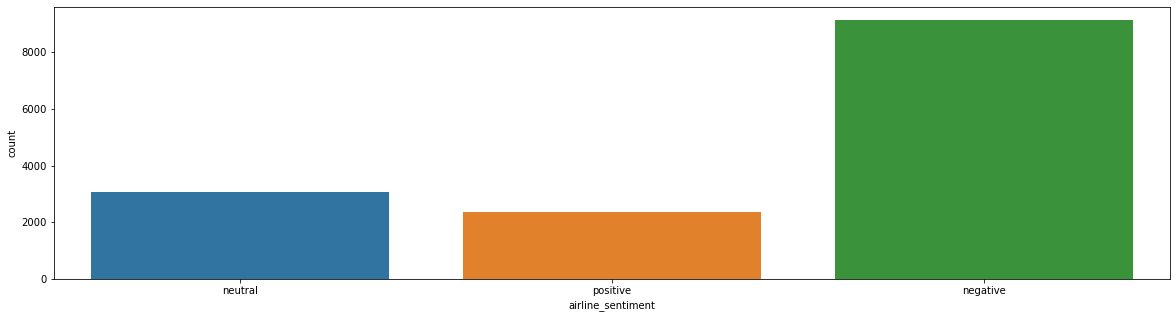

In [57]:
y = tweets_data_relevant['airline_sentiment']
print(y.value_counts())
plt.figure(figsize=(20,5)) 
g = sns.countplot(y)
# No, Here we can see that the data is not balanced, There are lot of negative sentiments

In [58]:
x = count_vectorizer_data_features     # Predictor feature columns
y = tweets_data_relevant['airline_sentiment']   # Predicted class

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)  # 1 is just any random seed number

In [59]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10197, 5000)
(10197,)
(4371, 5000)
(4371,)


In [61]:
#Applying SMOTE since data is not balanced
smt = SMOTE(random_state=0)
X_train_SMOTE, y_train_SMOTE = smt.fit_resample(x_train, y_train)

In [62]:
print(X_train_SMOTE.shape)
print(y_train_SMOTE.shape)

(19266, 5000)
(19266,)


In [63]:
y_train_SMOTE

0        negative
1        negative
2        positive
3        negative
4        negative
           ...   
19261    positive
19262    positive
19263    positive
19264    positive
19265    positive
Name: airline_sentiment, Length: 19266, dtype: object

negative    6422
positive    6422
neutral     6422
Name: airline_sentiment, dtype: int64


C:\Users\Eak.DESKTOP-EK9UGBG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


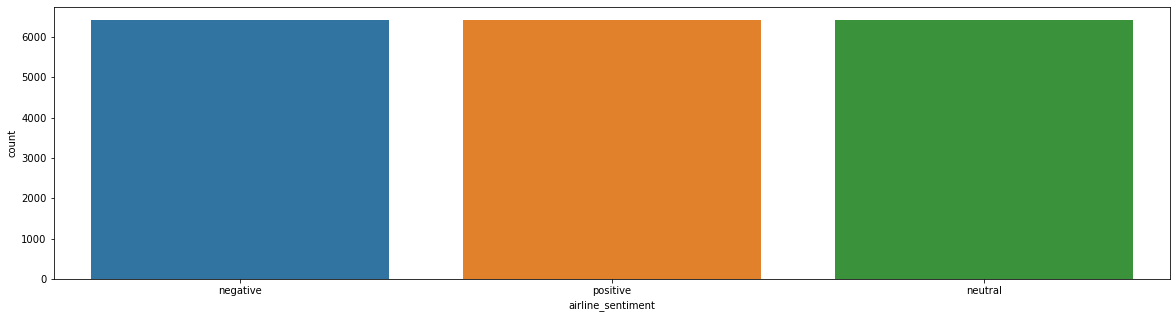

In [64]:
after_smote_airline_sentiment=pd.DataFrame(y_train_SMOTE, columns=['airline_sentiment']) 
y = after_smote_airline_sentiment['airline_sentiment']
print(y.value_counts())
plt.figure(figsize=(20,5)) 
g = sns.countplot(y)
# Here we can see that after applying smote, the data is balanced

In [65]:
# Dividing the test data into test and validation set in 50-50 ratio
x_validation, x_test_main, y_validation, y_test_main = train_test_split(x_test, y_test, test_size=0.50, random_state=1)

print(x_validation.shape)
print(x_test_main.shape)


print(y_validation.shape)
print(y_test_main.shape)

# There are 2185 samples for validation and 2186 samples for testing

(2185, 5000)
(2186, 5000)
(2185,)
(2186,)


In [67]:
# Initialize a Random Forest classifier with 100 trees
randomforestclassifier = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, #min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False) 
# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable

print ("Training the random forest...")
randomforestclassifier = randomforestclassifier.fit( X_train_SMOTE, y_train_SMOTE)

Training the random forest...


C:\Users\Eak.DESKTOP-EK9UGBG\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [68]:
randomforestclassifier.score(X_train_SMOTE, y_train_SMOTE)

0.9340807640402782

In [70]:
#print (np.mean(cross_val_score(randomforestclassifier,X_train_SMOTE, y_train_SMOTE,cv=10)))

In [71]:
# Make class predictions for the Validation set
y_validation_predict= randomforestclassifier.predict(x_validation)

In [72]:
print("Trainig accuracy",randomforestclassifier.score(X_train_SMOTE,y_train_SMOTE))  
print()
print("Validation accuracy",randomforestclassifier.score(x_validation, y_validation))
print()

Trainig accuracy 0.9340807640402782

Validation accuracy 0.7615560640732265



In [73]:
print(metrics.classification_report(y_validation,y_validation_predict))

              precision    recall  f1-score   support

    negative       0.81      0.90      0.85      1331
     neutral       0.60      0.51      0.55       467
    positive       0.74      0.60      0.66       387

    accuracy                           0.76      2185
   macro avg       0.71      0.67      0.69      2185
weighted avg       0.75      0.76      0.75      2185



ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (3).

<Figure size 432x288 with 0 Axes>

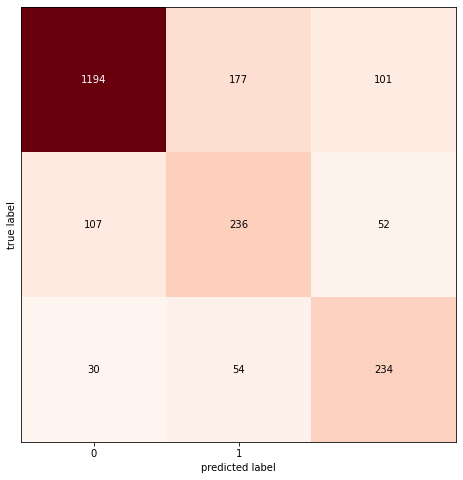

In [74]:
cm=confusion_matrix(y_validation_predict , y_validation)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

In [75]:
print("Testing accuracy",randomforestclassifier.score(x_test_main, y_test_main))
print()

Testing accuracy 0.7593778591033852



In [76]:
# Make class predictions for the Validation set
y_test_predict= randomforestclassifier.predict(x_test_main)

print(metrics.classification_report(y_test_main,y_test_predict))

              precision    recall  f1-score   support

    negative       0.82      0.89      0.85      1387
     neutral       0.61      0.49      0.54       465
    positive       0.64      0.60      0.62       334

    accuracy                           0.76      2186
   macro avg       0.69      0.66      0.67      2186
weighted avg       0.75      0.76      0.75      2186



ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (3).

<Figure size 432x288 with 0 Axes>

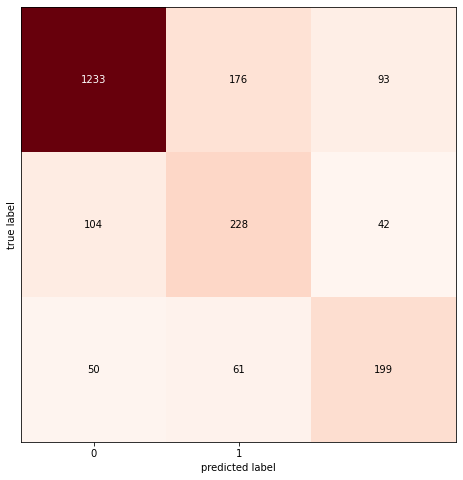

In [77]:
cm=confusion_matrix(y_test_predict , y_test_main)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

In [79]:
x_tf_idf = tfidf_vectorizer_data_features     # Predictor feature columns
y_tf_idf = tweets_data_relevant['airline_sentiment']   # Predicted class

x_train_tf_idf, x_test_tf_idf, y_train_tf_idf, y_test_tf_idf = train_test_split(x_tf_idf, y_tf_idf, test_size=0.3, random_state=1)  # 1 is just any random seed number

In [80]:
print(x_train_tf_idf.shape)
print(y_train_tf_idf.shape)
print(x_test_tf_idf.shape)
print(y_test_tf_idf.shape)

(10197, 5000)
(10197,)
(4371, 5000)
(4371,)


negative    9140
neutral     3083
positive    2345
Name: airline_sentiment, dtype: int64


C:\Users\Eak.DESKTOP-EK9UGBG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


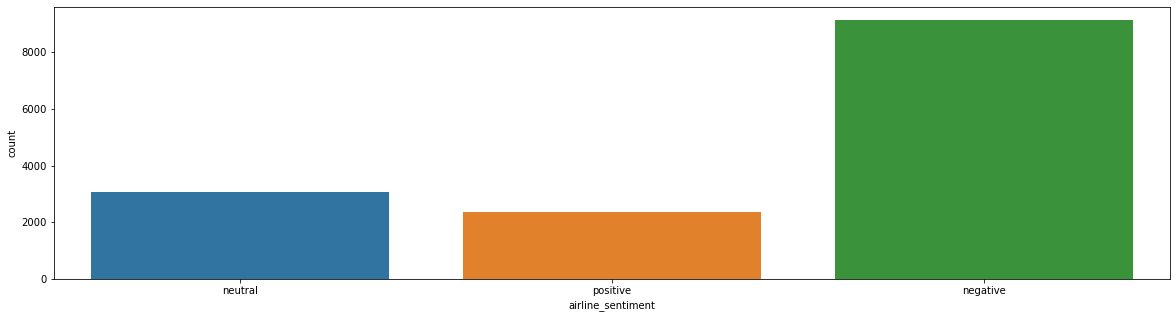

In [81]:
y = tweets_data_relevant['airline_sentiment']
print(y.value_counts())
plt.figure(figsize=(20,5)) 
g = sns.countplot(y)
# No, Here we can see that the data is not balanced, There are lot of negative sentiments

In [82]:
tf_idf_smt = SMOTE(random_state=0)
X_train_tf_idf_SMOTE, y_train_tf_idf_SMOTE = smt.fit_resample(x_train_tf_idf, y_train_tf_idf)

In [83]:
print(X_train_tf_idf_SMOTE.shape)
print(y_train_tf_idf_SMOTE.shape)

(19266, 5000)
(19266,)


negative    6422
positive    6422
neutral     6422
Name: airline_sentiment, dtype: int64


C:\Users\Eak.DESKTOP-EK9UGBG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


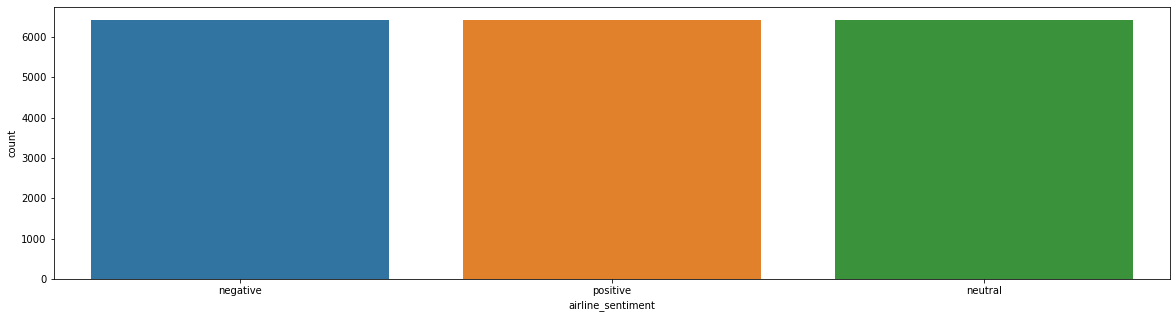

In [84]:
after_smote_airline_sentiment_tf_idf=pd.DataFrame(y_train_tf_idf_SMOTE, columns=['airline_sentiment']) 
y = after_smote_airline_sentiment_tf_idf['airline_sentiment']
print(y.value_counts())
plt.figure(figsize=(20,5))
g = sns.countplot(y)
# Here we can see that after smote , the data is balanced

In [85]:
# Dividing the test data into test and validation set in 50-50 ratio
x_validation_tf_idf, x_test_main_tf_idf, y_validation_tf_idf, y_test_main_tf_idf = train_test_split(x_test_tf_idf, y_test_tf_idf, test_size=0.50, random_state=1)

print(x_validation_tf_idf.shape)
print(x_test_main_tf_idf.shape)


print(y_validation_tf_idf.shape)
print(y_test_main_tf_idf.shape)

# There are 2185 samples for validation and 2186 samples for testing

(2185, 5000)
(2186, 5000)
(2185,)
(2186,)


In [86]:
# Initialize a Random Forest classifier with 100 trees
randomforestclassifier_tf_idf = RandomForestClassifier(verbose=1,n_jobs=-1,n_estimators = 100) 
# Fit the forest to the training set

print ("Training the random forest...")
randomforestclassifier_tf_idf = randomforestclassifier_tf_idf.fit( X_train_tf_idf_SMOTE, y_train_tf_idf_SMOTE)

Training the random forest...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   49.1s finished


In [87]:
randomforestclassifier_tf_idf.score(X_train_tf_idf_SMOTE, y_train_tf_idf_SMOTE)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.9s finished


0.9977161839510018

In [88]:
print (np.mean(cross_val_score(randomforestclassifier_tf_idf,X_train_tf_idf_SMOTE, y_train_tf_idf_SMOTE,cv=10)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   54.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   46.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]:

0.9142104520070852


In [89]:
# Make class predictions for the Validation set
y_validation_predict_tf_idf= randomforestclassifier_tf_idf.predict(x_validation_tf_idf)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [90]:
print("Trainig accuracy",randomforestclassifier_tf_idf.score(X_train_tf_idf_SMOTE,y_train_tf_idf_SMOTE))  
print()
print("Validation accuracy",randomforestclassifier_tf_idf.score(x_validation_tf_idf, y_validation_tf_idf))
print()

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s


Trainig accuracy 0.9977161839510018

Validation accuracy 0.7803203661327232



[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [91]:
print(metrics.classification_report(y_validation_tf_idf,y_validation_predict_tf_idf))

              precision    recall  f1-score   support

    negative       0.81      0.92      0.86      1331
     neutral       0.66      0.52      0.58       467
    positive       0.80      0.62      0.70       387

    accuracy                           0.78      2185
   macro avg       0.76      0.69      0.71      2185
weighted avg       0.77      0.78      0.77      2185



ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (3).

<Figure size 432x288 with 0 Axes>

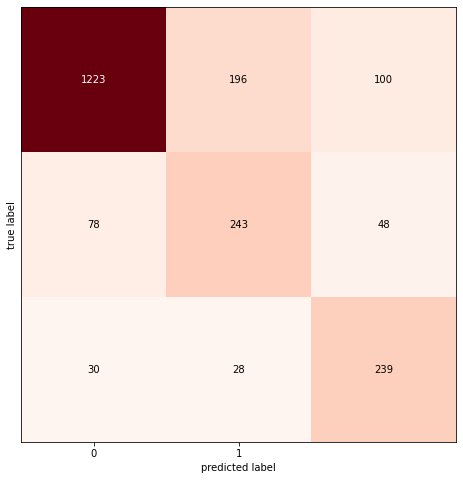

In [92]:
cm=confusion_matrix(y_validation_predict_tf_idf , y_validation_tf_idf)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

In [93]:
print("Test accuracy",randomforestclassifier_tf_idf.score(x_test_main_tf_idf, y_test_main_tf_idf))
print()

Test accuracy 0.7749313815187557



[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [94]:
# Make class predictions for the test set
y_test_predict_tf_idf= randomforestclassifier_tf_idf.predict(x_test_main_tf_idf)
print(metrics.classification_report(y_test_main_tf_idf,y_test_predict_tf_idf))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


              precision    recall  f1-score   support

    negative       0.81      0.91      0.86      1387
     neutral       0.64      0.50      0.56       465
    positive       0.73      0.58      0.65       334

    accuracy                           0.77      2186
   macro avg       0.73      0.66      0.69      2186
weighted avg       0.76      0.77      0.76      2186



ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (3).

<Figure size 432x288 with 0 Axes>

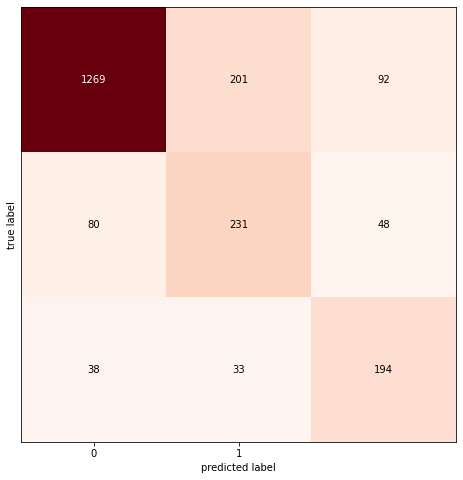

In [95]:
cm=confusion_matrix(y_test_predict_tf_idf , y_test_main_tf_idf)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

Trainig accuracy 0.9340807640402782

Testing accuracy 0.7593778591033852

              precision    recall  f1-score   support

    negative       0.82      0.89      0.85      1387
     neutral       0.61      0.49      0.54       465
    positive       0.64      0.60      0.62       334

    accuracy                           0.76      2186
   macro avg       0.69      0.66      0.67      2186
weighted avg       0.75      0.76      0.75      2186



ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (3).

<Figure size 432x288 with 0 Axes>

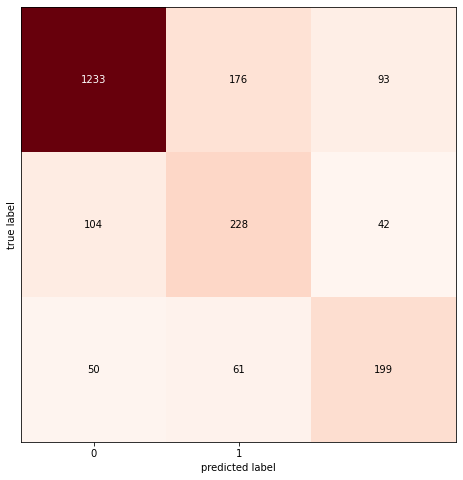

In [96]:
print("Trainig accuracy",randomforestclassifier.score(X_train_SMOTE,y_train_SMOTE))  
print()
print("Testing accuracy",randomforestclassifier.score(x_test_main, y_test_main))
print()

y_test_predict= randomforestclassifier.predict(x_test_main)
print(metrics.classification_report(y_test_main,y_test_predict))

cm=confusion_matrix(y_test_predict , y_test_main)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s


Trainig accuracy 0.9977161839510018

Test accuracy 0.7749313815187557



[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

    negative       0.81      0.91      0.86      1387
     neutral       0.64      0.50      0.56       465
    positive       0.73      0.58      0.65       334

    accuracy                           0.77      2186
   macro avg       0.73      0.66      0.69      2186
weighted avg       0.76      0.77      0.76      2186



[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (3).

<Figure size 432x288 with 0 Axes>

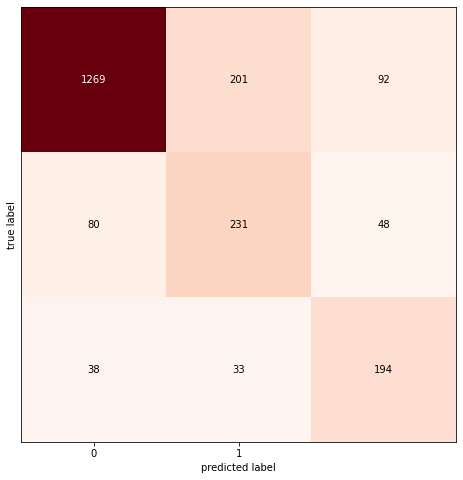

In [97]:
print("Trainig accuracy",randomforestclassifier_tf_idf.score(X_train_tf_idf_SMOTE,y_train_tf_idf_SMOTE))  
print()
print("Test accuracy",randomforestclassifier_tf_idf.score(x_test_main_tf_idf, y_test_main_tf_idf))
print()

# Make class predictions for the test set
y_test_predict_tf_idf= randomforestclassifier_tf_idf.predict(x_test_main_tf_idf)
print(metrics.classification_report(y_test_main_tf_idf,y_test_predict_tf_idf))

cm=confusion_matrix(y_test_predict_tf_idf , y_test_main_tf_idf)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


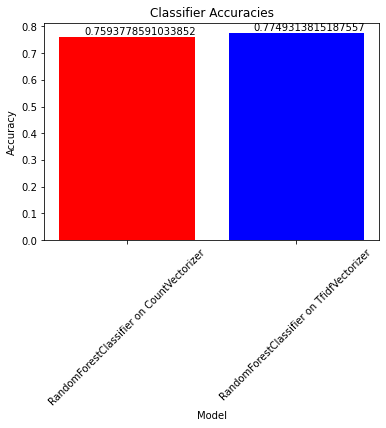

In [102]:
Accuracy=[]
Model=[]
Accuracy.append(randomforestclassifier.score(x_test_main, y_test_main))
Accuracy.append(randomforestclassifier_tf_idf.score(x_test_main_tf_idf, y_test_main_tf_idf))
Model.append("RandomForestClassifier on CountVectorizer")
Model.append("RandomForestClassifier on TfidfVectorizer")


index=[0,1]
c = ['red', 'blue']
plt.bar(index,Accuracy,color=c)
plt.xticks(index,Model,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Classifier Accuracies')

xlocs, xlabs = plt.xticks()

for i, v in enumerate(Accuracy):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))

# The RandomForestClassfier on TfidfVectorizer is having better accuracy

# Summary
RandomForestClassifier on TfidfVectorizer has an accuracy of 77% whereas RandomForestClassifier on CountVectorizer has an accuracy of 75%. This shows that the model using TfidfVectorizer is better.
Model is able to predict airline sentiment correctly 77% of the time
United Airlines, US Airways, American Airlines has the most number of negative review
Virgin America has the least number of negative reviews
Customer service and Late flight seems to be the main reason why customers are giving bad feedback